In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC

from notipy import notify

# Set seaborn default theme

sns.set_theme(style='dark')



In [4]:
# Fetch MNIST data
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto')

In [ ]:
# Split data in training, and test sets
X = mnist['data']
y = mnist['target'].astype(np.uint8)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.2, random_state=42)

In [ ]:
# Normalize data
X_train = X_train/255

### EDA

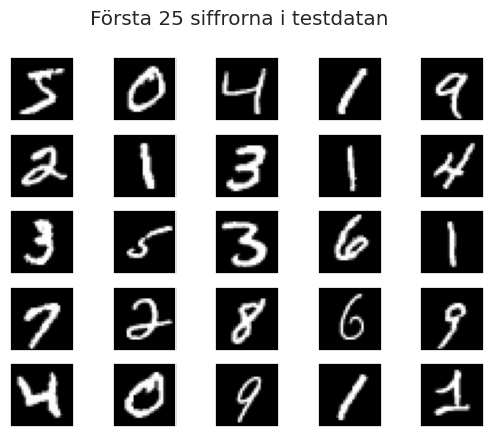

In [ ]:
# Plot 25 first numbers
fig, axs = plt.subplots(5, 5)
for img, ax in zip(X_train[:25], axs.ravel()):
    ax.imshow(img.reshape(28, -1), cmap='gray')
    ax.tick_params('both', bottom=False, left=False, labelbottom=False, labelleft=False)
fig.suptitle('Första 25 siffrorna i testdatan');

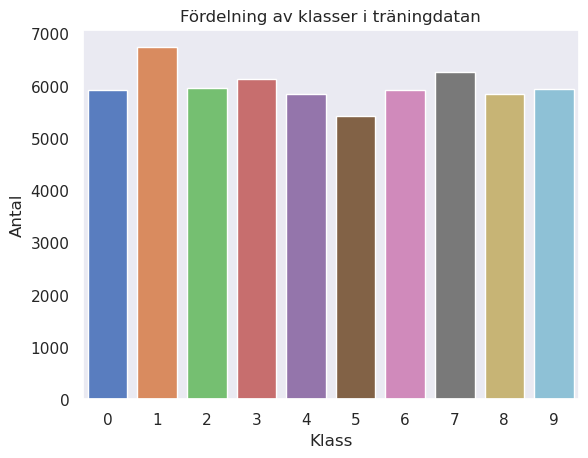

In [ ]:
# Plot distribution of numbers
ax = sns.barplot(x=pd.Series(y_train).value_counts().index, y=pd.Series(y_train).value_counts(), hue=pd.Series(y_train).value_counts().index, palette='muted', legend=None)
ax.set(title='Fördelning av klasser i träningdatan', xlabel='Klass', ylabel='Antal');

### Träna modeller

In [ ]:
cv = ShuffleSplit(n_splits=3, test_size=.2, random_state=42)

In [ ]:
def train_classifier(clf, X, y, cv, title=''):
    """ Train classifier and print f1 score """
    clf.fit(X, y)
    cv_train_score = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
    print(f'[*] {title}')
    print(f'[i] Average f1 score: {cv_train_score.mean():.2f} +/- {cv_train_score.std():.2f}')
    print(f'{35*"-"}')

In [ ]:
def evaluate_classifier(clf, X, y, title=''):
    """ Evaluate classifier on validation data and plot results"""
    y_pred = cross_val_predict(clf, X, y)
    c_rep = classification_report(y, y_pred)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.text(0, .25, c_rep, fontfamily='monospace', fontsize='x-small')
    ax1.set(title='Classification report', xticks=[], yticks=[])
    cmat = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
    cmat.plot(ax=ax2, cmap='cividis', text_kw={'fontfamily': 'monospace', 'fontsize': 'x-small'})
    ax2.set(title='Confusion matrix')
    fig.suptitle(f'Model evaluation | {title}')

### Linear SVC

[*] Linear SVC
[i] Average f1 score: 0.83 +/- 0.00
-----------------------------------


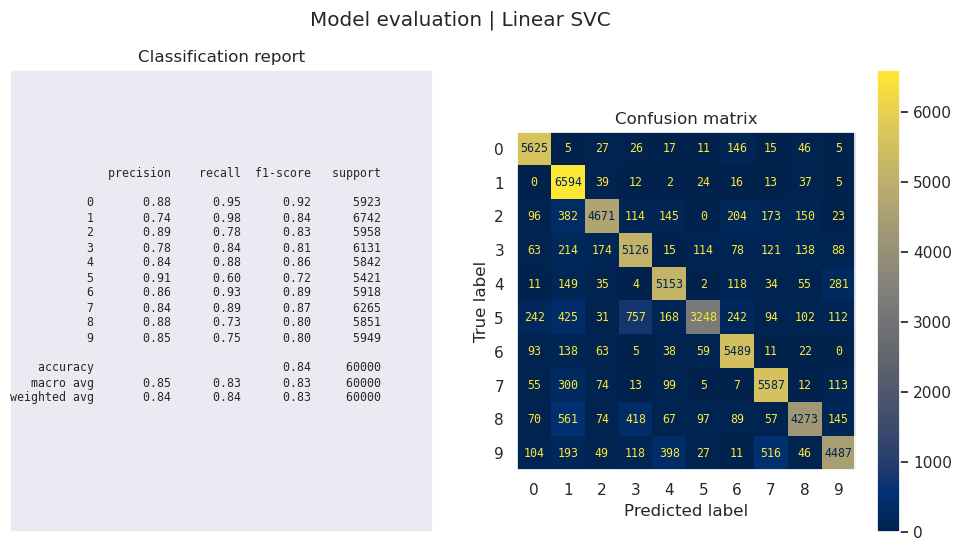

In [ ]:
title = 'Linear SVC'
lin_svc = LinearSVC(dual='auto')
train_classifier(lin_svc, X_train, y_train, cv, title)
evaluate_classifier(lin_svc, X_train, y_train, title)

notify(text=f'{title} done!')

### KNN

[*] KNN
[i] Average f1 score: 0.97 +/- 0.00
-----------------------------------


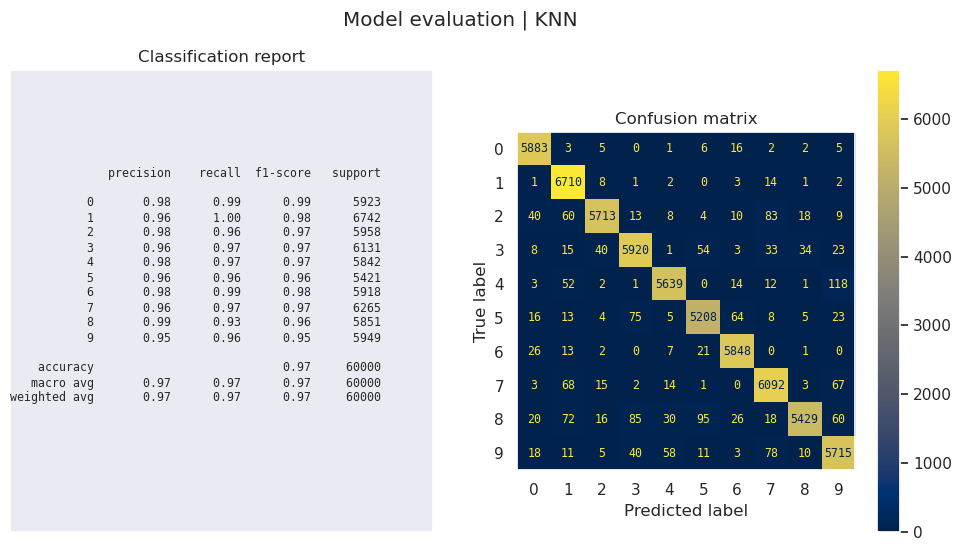

In [ ]:
title = 'KNN'
knn = KNeighborsClassifier()
train_classifier(knn, X_train, y_train, cv, title)
evaluate_classifier(knn, X_train, y_train, title)

notify(text=f'{title} done!')

### SVC

[*] SVC
[i] Average f1 score: 0.98 +/- 0.00
-----------------------------------


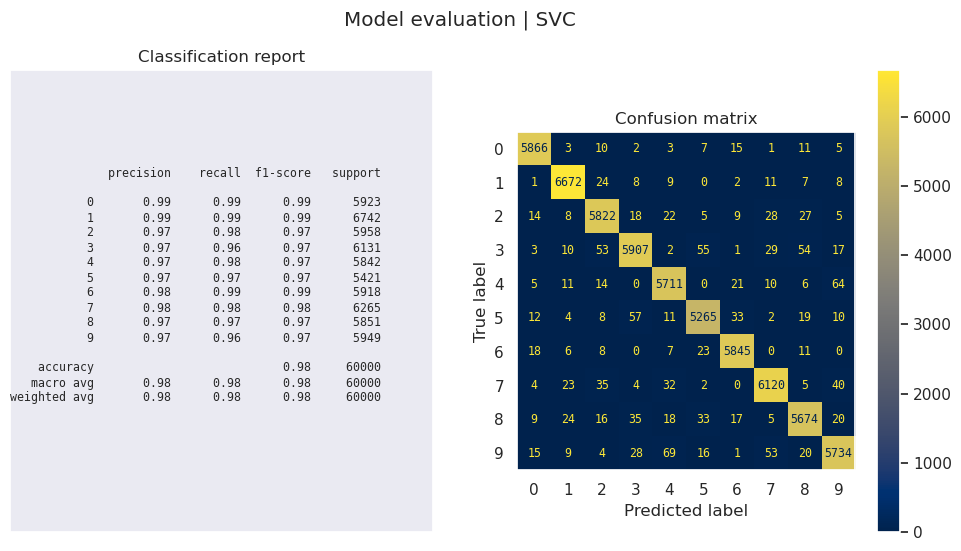

In [ ]:
title = 'SVC'
svc = SVC()
train_classifier(svc, X_train, y_train, cv, title)
evaluate_classifier(svc, X_train, y_train, title)

notify(text=f'{title} done!')

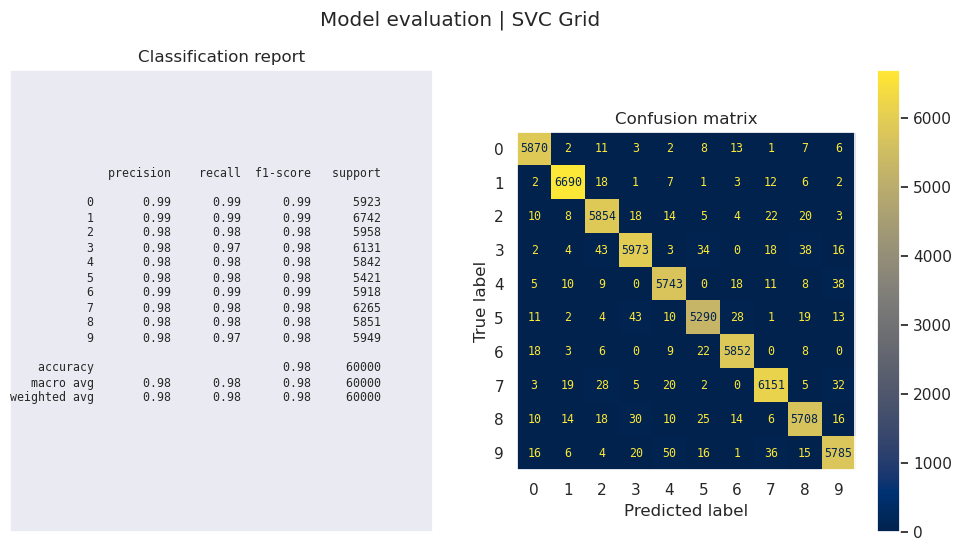

In [ ]:
grid_params = {
    'C': [1, 5, 10],
}

svc_grid = GridSearchCV(SVC(), grid_params, cv=cv, scoring='f1_macro')
svc_grid.fit(X_train, y_train)
evaluate_classifier(svc_grid.best_estimator_, X_train, y_train, 'SVC Grid')

notify(text='SVC Grid done!')

In [ ]:
svc_grid.best_params_

{'C': 10}

### Evaluera bästa modellen på testdatan

In [ ]:
# Normalize test data
X_test = X_test/255


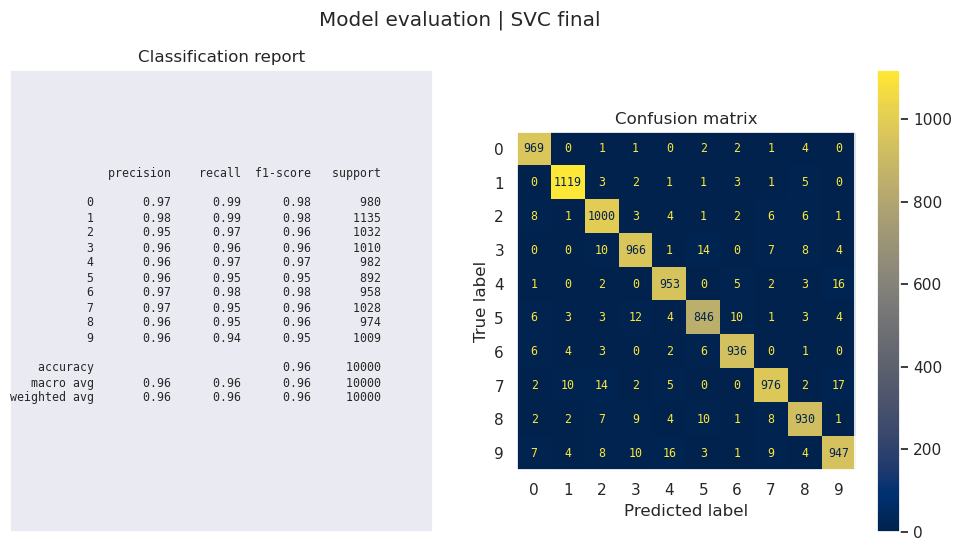

In [ ]:
title = 'SVC final'
evaluate_classifier(svc_grid.best_estimator_, X_test, y_test, title)
notify(text=f'{title} done!')

In [ ]:
joblib.dump(svc_grid.best_estimator_, 'svc.pkl')